<a href="https://colab.research.google.com/github/Seouyang/Today-I-Learned/blob/master/pca_and_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised learning
Unsupervised learning is type of learning algorithms that utilize unlabeled data to find commonalities or similarities among the data.

*   Clustering: task of grouping data points according to some measure of similarity
*   Association: task of discovering relations between the attributes of data points
*   Feature selection: a procedure to select a subset from the original feature set by eliminating redundant and less informative features







In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import cluster
from sklearn.preprocessing import StandardScaler

In [3]:
X, T = fetch_openml('mnist_784', version=1, return_X_y=True)

#extract 0~4 digits
for i in range(5):
  temp_arr = X[T=='{}'.format(i)]
  temp_arr_T = T[T=='{}'.format(i)]
  try:
    X_part = np.vstack([X_part, temp_arr])
    T_part = np.concatenate([T_part, temp_arr_T])
  except:
    X_part = temp_arr
    T_part = temp_arr_T

In [4]:
np.random.seed(1)
X_train, X_test, T_train, T_test = train_test_split(X_part, T_part, train_size=5000, test_size=1000, shuffle=True)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [5]:
#TSNE for visualization
from sklearn.manifold import TSNE

model = TSNE(learning_rate=300, random_state=1)
TSNE_X = model.fit_transform(X_train_s)

In [13]:
#image plotting function
def img_plt(X_train, Y_train, n):
  X_train_2d = X_train.reshape(X_train.shape[0], 28, 28)
  fig, axes = plt.subplots(n, 10, figsize=(7.5,7.5))
  for j in range(n):
    for i in range(10):
        ax = axes[j, i]
        try:        
          ax.imshow(X_train_2d[Y_train==j][i], cmap='gray_r')
          ax.axis('off')
          if i == 0:
            ax.set_title('Cluster: {}'.format(j))
        except:
          ax.axis('off')
  plt.tight_layout()
  plt.show()

In [7]:
#visualization with TSNE
def vec_vis(x, y, T, n):
  plt.rcParams['figure.figsize'] = [20, 8]
  color_num = n
  fig = plt.figure()
  ax1 = fig.add_subplot(1, 2, 1)
  ax2 = fig.add_subplot(1, 2, 2)

  xs = x[:, 0]
  ys = x[:, 1]
  ax1.set_title("t-SNE visualization with clustering")
  scatter = ax1.scatter(xs, ys, c=y, cmap=plt.get_cmap('rainbow', color_num))
  legend = ax1.legend(*scatter.legend_elements(), loc='upper right', title='Clusters')
  ax2.set_title("t-SNE visualization with true label")
  scatter = ax2.scatter(xs, ys, c=list(map(int, T)), cmap=plt.get_cmap('rainbow', 5))
  legend = ax2.legend(*scatter.legend_elements(), loc='upper right', title='Labels')
  plt.show()

**Step 1-1. K-Means clustering**

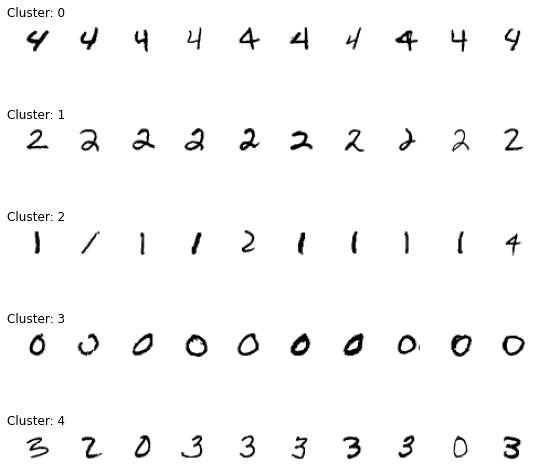

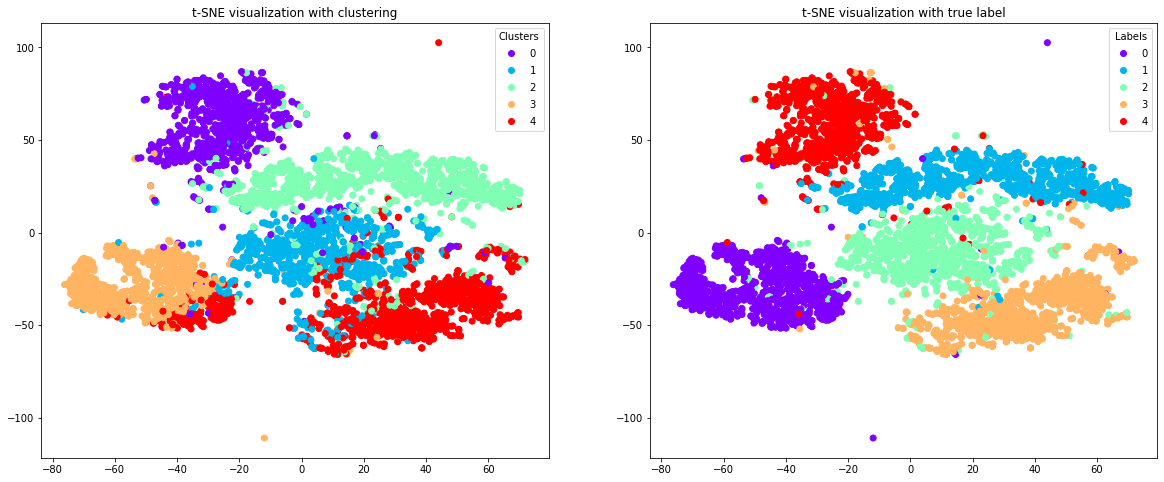

In [14]:
n = 5
model = cluster.KMeans(n_clusters=n, random_state=1)
Y_train = model.fit_predict(X_train_s)
img_plt(X_train, Y_train, n)
vec_vis(TSNE_X, Y_train, T_train, n)

**Step 1-2. Agglomerative clustering**

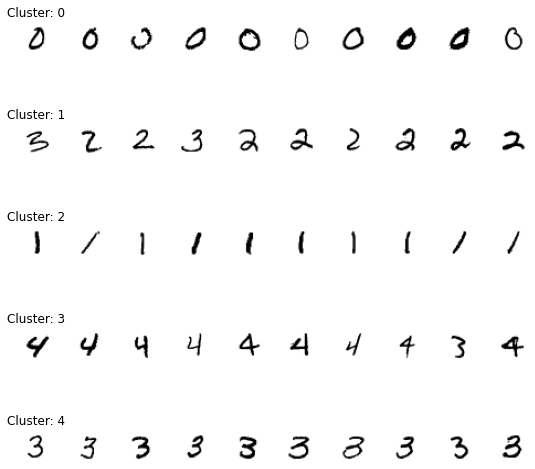

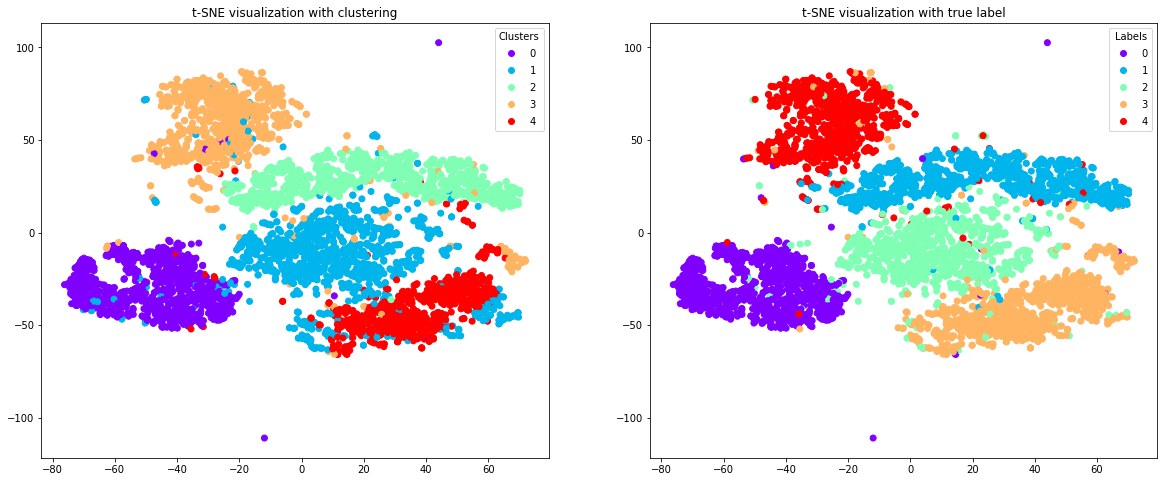

In [15]:
n = 5
model = cluster.AgglomerativeClustering(n_clusters=n, linkage='ward')
Y_train = model.fit_predict(X_train_s)
img_plt(X_train, Y_train, n)
vec_vis(TSNE_X, Y_train, T_train, n)

**Step 2. Clustering after dimension reduction using PCA**

MNIST data is too high dimensional - 784(28X28). Clustering algorithm is based on Euclidean distance, it is better to reduce the dimension of the data to make the model work well.

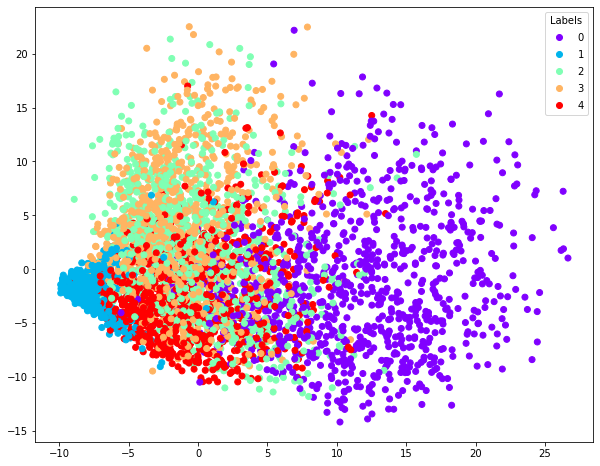

In [16]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=30).fit(X_train_s)
reduced_X = pca.transform(X_train_s)

color_num = 5
plt.rcParams['figure.figsize'] = [10, 8]
xs = reduced_X[:, 0]
ys = reduced_X[:, 1]

scatter = plt.scatter(xs, ys, c=list(map(int, T_train)), cmap=plt.get_cmap('rainbow', color_num))
legend = plt.legend(*scatter.legend_elements(), loc='upper right', title='Labels')
plt.show()

In [17]:
#TSNE for visualization
model = TSNE(learning_rate=300, random_state=1)
TSNE_X_red = model.fit_transform(reduced_X)

**Step 2-1. K-Means with reduced input**

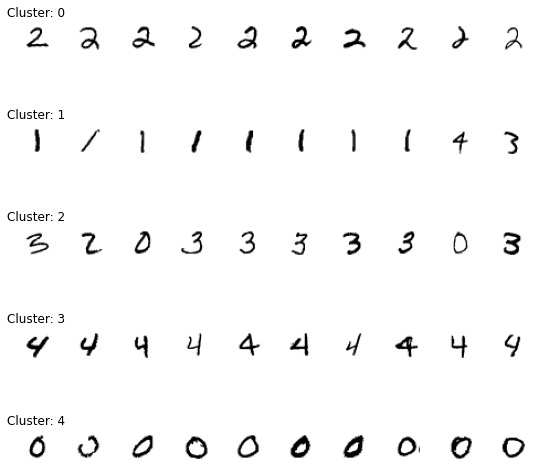

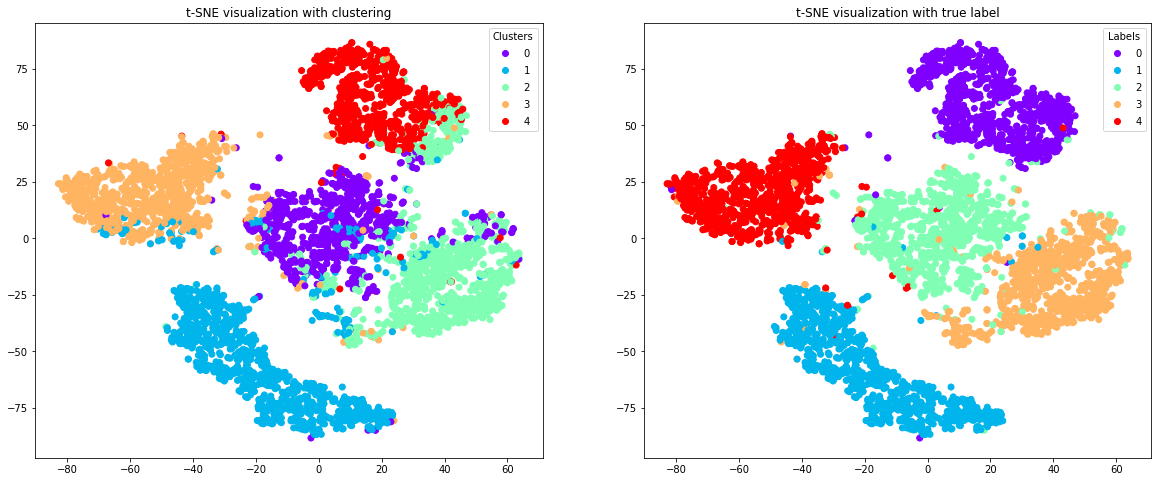

In [18]:
n = 5
model = cluster.KMeans(n_clusters=n, random_state=1)
Y_train = model.fit_predict(reduced_X)
img_plt(X_train, Y_train, n)
vec_vis(TSNE_X_red, Y_train, T_train, n)

**Step 2-2. Agglomerative clustering with reduced input**

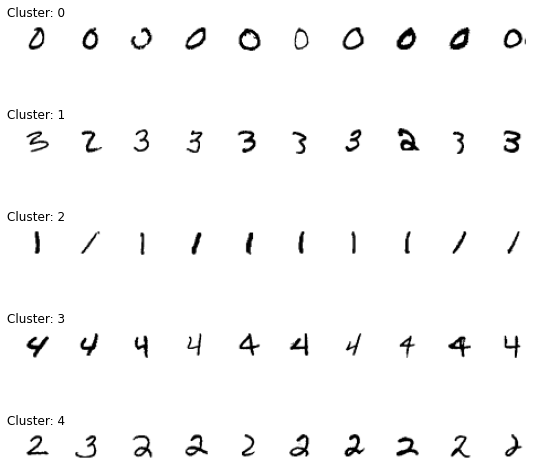

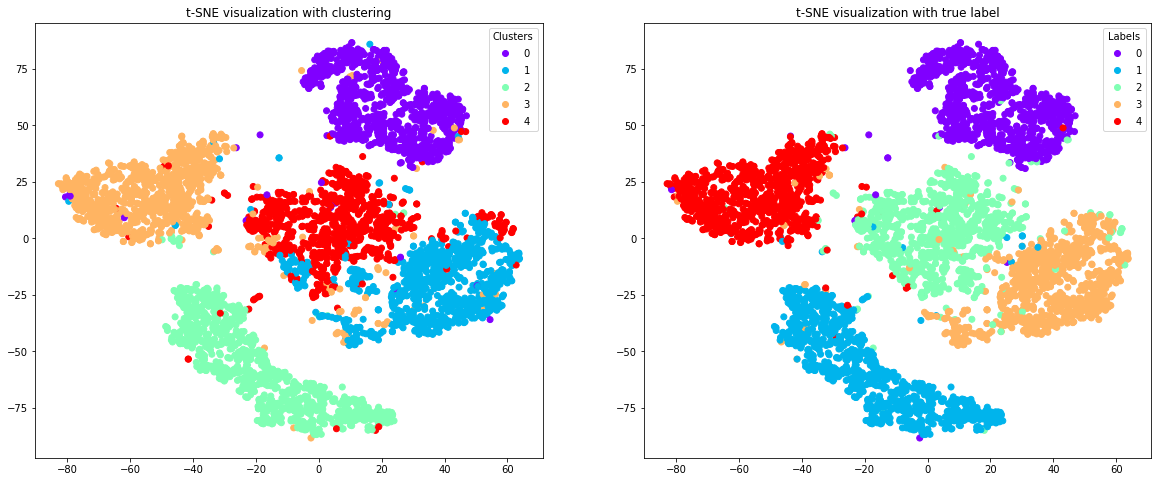

In [19]:
n = 5
model = cluster.AgglomerativeClustering(n_clusters=n, linkage='ward')
Y_train = model.fit_predict(reduced_X)
img_plt(X_train, Y_train, n)
vec_vis(TSNE_X_red, Y_train, T_train, n)

**Step 3-1. DBSCAN with MNIST original data**

Number of clusters:  2
Number of noise points:  3955


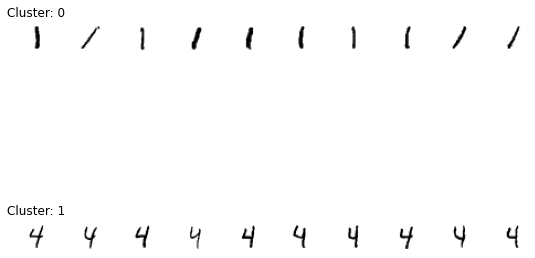

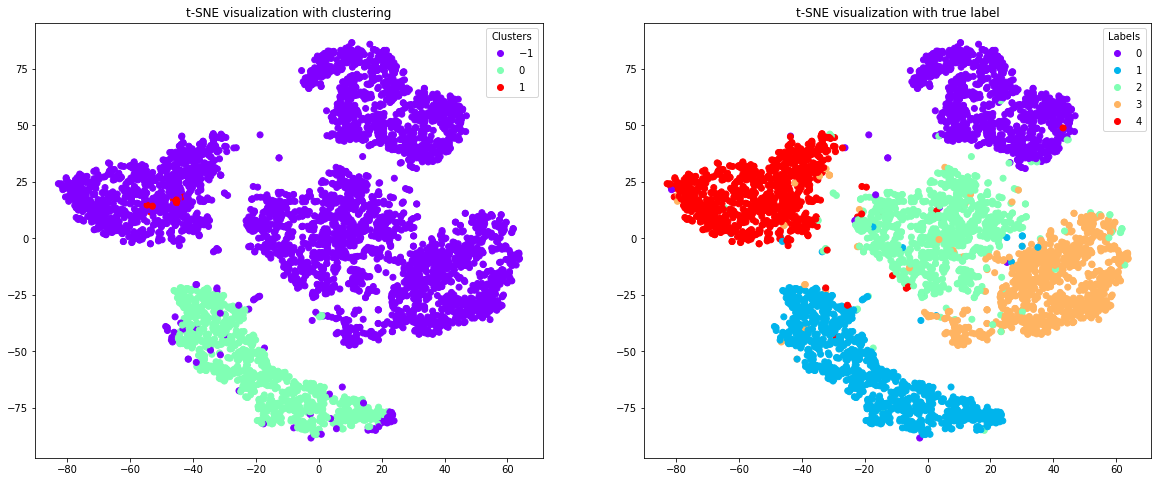

In [23]:
model = cluster.DBSCAN(eps=5, min_samples=10)
Y_train = model.fit_predict(reduced_X)

labels = model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n = n_clusters_
print("Number of clusters: ", n_clusters_)
print("Number of noise points: ", n_noise_)

img_plt(X_train, Y_train, n)
vec_vis(TSNE_X_red, Y_train, T_train, n+1)

**Step 3-2. DBSCAN with synthetic data**

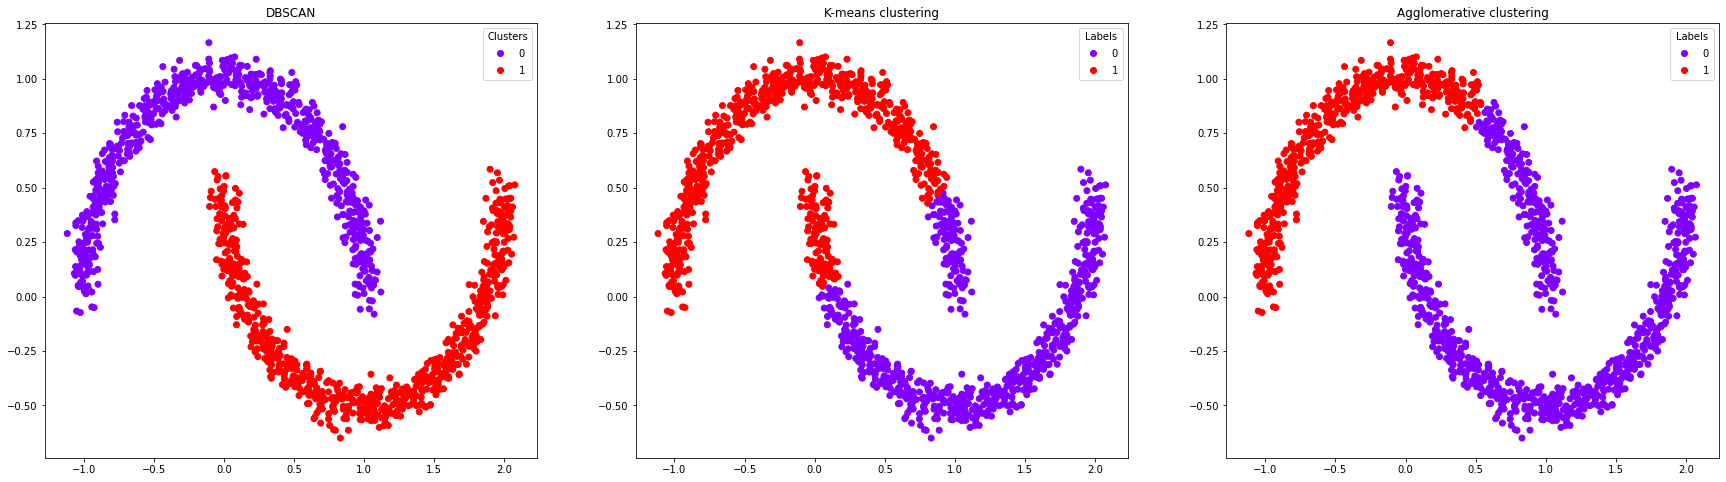

In [24]:
from sklearn import datasets

np.random.seed(1)
noisy_moons = datasets.make_moons(n_samples=1500, noise=.05)

X_train2, T_train2 = noisy_moons

scaler2 = StandardScaler()
X_train_s2 = scaler2.fit_transform(X_train2)

model2 = cluster.DBSCAN(eps=0.3, min_samples=10)
Y_train2_d = model2.fit_predict(X_train_s2)

model2 = cluster.KMeans(n_clusters=2, random_state=1)
Y_train2_k = model2.fit_predict(X_train_s2)

model2 = cluster.AgglomerativeClustering(n_clusters=2)
Y_train2_a = model2.fit_predict(X_train_s2)

plt.rcParams['figure.figsize'] = [30, 8]
fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

xs = X_train2[:, 0]
ys = X_train2[:, 1]
ax1.set_title("DBSCAN")
scatter = ax1.scatter(xs, ys, c=Y_train2_d, cmap=plt.get_cmap('rainbow', 5))
legend = ax1.legend(*scatter.legend_elements(), loc='upper right', title='Clusters')
ax2.set_title("K-means clustering")
scatter = ax2.scatter(xs, ys, c=Y_train2_k, cmap=plt.get_cmap('rainbow', 5))
legend = ax2.legend(*scatter.legend_elements(), loc='upper right', title='Labels')
ax3.set_title("Agglomerative clustering")
scatter = ax3.scatter(xs, ys, c=Y_train2_a, cmap=plt.get_cmap('rainbow', 5))
legend = ax3.legend(*scatter.legend_elements(), loc='upper right', title='Labels')
plt.show()